<a href="https://colab.research.google.com/github/baidut/paq2piq/blob/master/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Take a look at the [repository](https://github.com/baidut/paq2piq/) for more information

# Minimal PyTorch Example, no installation required


Make sure PyTorch, PIL and numpy are installed

1. Download the pretrained model and a test image:



In [0]:
# download the model
!wget -O RoIPoolModel.pth -N https://github.com/baidut/PaQ-2-PiQ/releases/download/v1.0/RoIPoolModel-fit.10.bs.120.pth

# download a test image
!wget -N https://github.com/baidut/PaQ-2-PiQ/releases/download/v1.0/Picture1.jpg

# download the standalone version of code
!wget -N https://raw.githubusercontent.com/baidut/PaQ-2-PiQ_GAE/master/paq2piq_standalone.py

2. Run the following code, that's it:



In [0]:
from paq2piq_standalone import *

model = InferenceModel(RoIPoolModel(), 'RoIPoolModel.pth')
model.blk_size = (3, 5)
model.predict_from_file("Picture1.jpg")

# Adapt the model for a new image domain

If your testing images are mostly with "fair" and "poor" quality, you might with the model can predict "excellent" for those are relatively good. To make sure the model's prediction to cover all five categories, we suggest you to do the adaptation process:

1. prepare a representative dataset using sampled images from the new image domain
2. run `model.adapt_from_dir('\path\to\your_images')` to get the normalization parameters `[peak, std1, std2]`
3. set the parameters before predicting `model.norm_params = [peak, std1, std2]`

## Example: adapt for the CLIVE database  

In [0]:
# download CLIVE database
!wget -N  https://github.com/baidut/PaQ-2-PiQ/releases/download/v1.0/CLIVE.tgz
!tar zxvf CLIVE.tgz

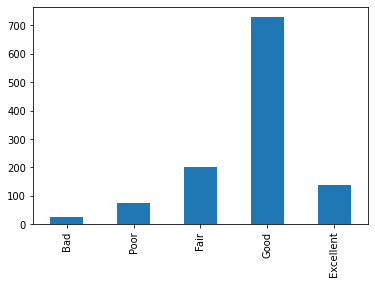

In [62]:
import pandas as pd
from paq2piq_standalone import *
model = InferenceModel(RoIPoolModel(), 'RoIPoolModel.pth')
pd.Series(categories).value_counts().reindex(model.categories).plot(kind='bar')

First, get the normalization parameters using the images in the new domain:

In [52]:
model = InferenceModel(RoIPoolModel(), 'RoIPoolModel.pth')
model.adapt_from_dir('CLIVE/Images')

(73, 9.257462, 3.1872356)

Second, change `N_std` to a smaller number if you wish to have a more "spread-out" classification results.

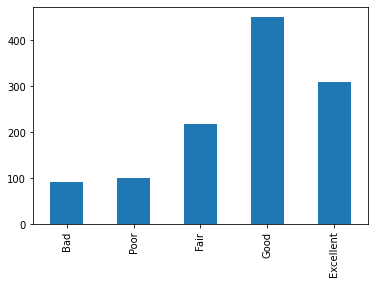

In [6]:
from paq2piq_standalone import *
import pandas as pd

model = InferenceModel(RoIPoolModel(), 'RoIPoolModel.pth')
model.norm_params = (73, 9.257462, 3.1872356)
model.N_std = 2
new_categories = [model.predict_from_file(f)['category'] for f in img_files_in('CLIVE/Images')]
pd.Series(new_categories).value_counts().reindex(model.categories).plot(kind='bar')

Third, change 'new_peak' if you wish most images to get that score. Here it's set to 50, so most images are classified as "Fair".


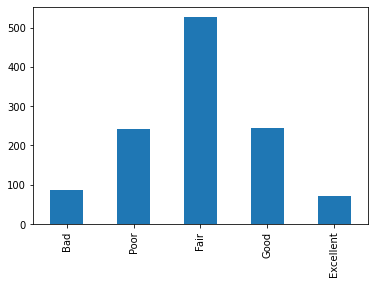

In [7]:
from paq2piq_standalone import *
import pandas as pd

model = InferenceModel(RoIPoolModel(), 'RoIPoolModel.pth')
model.norm_params = (73, 9.257462, 3.1872356)
model.new_peak = 50 
model.N_std = 2.5 # the smaller, more spread-out 
new_categories = [model.predict_from_file(f)['category'] for f in img_files_in('CLIVE/Images')]
pd.Series(new_categories).value_counts().reindex(model.categories).plot(kind='bar')

# Installation

In [0]:
!git clone https://github.com/baidut/paq2piq/

In [0]:
import os
os.chdir('paq2piq/')

In [0]:
!pip install -r requirements.txt

In [0]:
!wget -O RoIPoolModel.pth -N https://github.com/baidut/PaQ-2-PiQ/releases/download/v1.0/RoIPoolModel-fit.10.bs.120.pth

# Test on a given image

In [0]:
from PIL import Image
from paq2piq.inference_model import *

image = Image.open("images/Picture1.jpg")
model = InferenceModel(RoIPoolModel(), 'RoIPoolModel.pth')
output = model.predict_from_pil_image(image)

In [0]:
output['global_score']

78.962646484375

In [0]:
type(output['local_scores'])

numpy.ndarray

In [0]:
output['local_scores'].shape

(20, 20)

In [0]:
from paq2piq.common import blend_output
blended = blend_output(image, output, vmin=None, vmax=None)

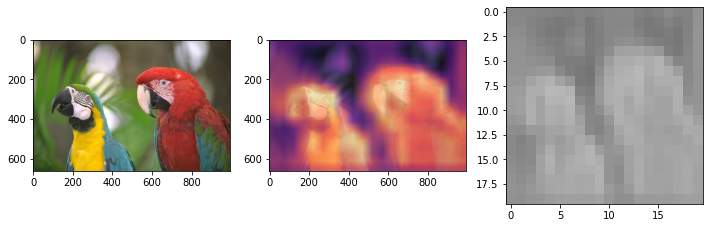

In [0]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(12, 8 * 3))

axes[0].imshow(image)
axes[1].imshow(blended)
axes[2].imshow(output['local_scores'], cmap='gray', vmin=0, vmax=100)

# Command Line Usage

In [0]:
!python cli.py --help

Usage: cli.py [OPTIONS] COMMAND [ARGS]...

Options:
  --help  Show this message and exit.

Commands:
  get-image-score  Get image scores
  train-model      Train model
  validate-model   Validate model


In [0]:
!python cli.py get-image-score --help

Usage: cli.py get-image-score [OPTIONS]

Options:
  --path_to_model_state TEXT  path to model weight
                              .pth file
                              [required]
  --path_to_image TEXT        image   [required]
  --help                      Show this message
                              and exit.


In [0]:
!python cli.py get-image-score --path_to_model_state RoIPoolModel.pth \
--path_to_image images/Picture1.jpg